<!-- Projeto Desenvolvido na Data Silmara Basso - silmarabasso@yahoo.com.br -->
# <font color='blue'>Previsão de Cancelamento de Reserva</font>
# <font color='blue'>Pipelines de CI/CD Para Operações de Machine Learning e IA</font>
## <font color='blue'>Laboratório ML</font>
### <font color='blue'> Processo Manual de Machine Learning Para Prever o Comportamento do Consumidor</font>

## Instalação, Carregamento e Gerenciamento de Pacotes

In [1]:
# Para atualizar um pacote, execute o comando abaixo no terminal ou prompt de comando:
# pip install -U nome_pacote

# Para instalar a versão exata de um pacote, execute o comando abaixo no terminal ou prompt de comando:
# pip install nome_pacote==versão_desejada

# Depois de instalar ou atualizar o pacote, reinicie o jupyter notebook.

# Instala o pacote watermark. 
# Esse pacote é usado para gravar as versões de outros pacotes usados neste jupyter notebook.
!pip install -q -U watermark

In [2]:
%env TF_CPP_MIN_LOG_LEVEL=3

env: TF_CPP_MIN_LOG_LEVEL=3


In [3]:
!pip install -q tensorflow==2.15

In [4]:
# Imports

# Imports para manipulação e visualização de dados
import numpy as np
import pandas as pd
import matplotlib as m
import matplotlib.pyplot as plt
import seaborn as sns

# Imports para pré-processamento e avaliação
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

# Imports para Deep Learning
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Input, Dropout
from keras.losses import categorical_crossentropy
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.optimizers import Nadam

In [5]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Previsão de Cancelamento" 

Author: Previsão de Cancelamento



## Dados Para Treinamento e Avaliação do Modelo

In [6]:
# Carrega o dataset
dataset = pd.read_csv("dataset.csv")

In [7]:
# Shape
dataset.shape

(119390, 32)

In [8]:
# Visualiza os dados
dataset.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


**Vamos usar Inteligência Artificial, especificamente Deep Learning, para prever o cancelamento de reservas em hotéis.**

## Quando é Necessário Fazer Análise Exploratória?

In [9]:
# Número de colunas
print(len(dataset.columns))

32


In [10]:
# Tipos de dados
dataset.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [11]:
# Vamos checar quais colunas são do tipo string
for column, series in dataset.items():
    if str(type(series[0])) == "<class 'str'>":
        print(column)

hotel
arrival_date_month
meal
country
market_segment
distribution_channel
reserved_room_type
assigned_room_type
deposit_type
customer_type
reservation_status
reservation_status_date


Não podemos levar valores no formato de texto para o treinamento do modelo. Vamos tratar isso daqui a pouco. Primeiro vamos checar se temos valores ausentes.

In [12]:
# Total de valores ausentes por coluna
dataset.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

Sim, temos em algumas colunas. Então vamos ao processo de limpeza e transformação dos dados.

## Pipeline de Limpeza e Transformação

In [13]:
# Remove a coluna "company"
dataset = dataset.drop(['company'], axis = 1)

In [14]:
# Remove a coluna "country"
dataset = dataset.drop(['country'], axis = 1)

In [15]:
# Removemos valores ausentes que ainda estverem no dataset
dataset = dataset.dropna()

In [16]:
# Shape
dataset.shape

(103048, 30)

In [17]:
# Total de valores ausentes por coluna
dataset.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

**Encoding da variável com o mês de chegada no hotel.**

In [ ]:
# Valores únicos para a coluna de mês de chegada
dataset.arrival_date_month.unique()

array(['July', 'August', 'September', 'October', 'November', 'December',
       'January', 'February', 'March', 'April', 'May', 'June'],
      dtype=object)

In [19]:
# Dicionário de meses
mes_dict = {"January": 1,
            "February": 2,
            "March": 3,
            "April": 4,
            "May": 5, 
            "June": 6,
            "July": 7,
            "August": 8,
            "September": 9,
            "October": 10,
            "November": 11,
            "December": 12}

In [20]:
# Vamos converter os meses para o valor numérico correspondente, conforme colocamos no dicionário
dataset["arrival_date_month_numerical"] = dataset.arrival_date_month.apply(lambda x: mes_dict[x])

In [21]:
# Total de registros para cada mês
dataset.arrival_date_month_numerical.value_counts()

arrival_date_month_numerical
8     12680
7     11604
5     10089
6      9806
4      9758
10     9461
9      9437
3      8149
2      6461
12     5631
11     5409
1      4563
Name: count, dtype: int64

Mês de Agosto teve o maior número de reservas e mês de Janeiro o menor. Isso se explica porque no hemisfério Norte o auge do Verão e as férias são em Agosto.

In [22]:
# Não precisamos mais da coluna "arrival_date_month"
dataset = dataset.drop("arrival_date_month", axis = 1)

**Encoding das variáveis com tipo de quarto reservado e tipo de quarto ocupado.**

In [23]:
# Valores únicos de quartos reservados
dataset.reserved_room_type.unique()

array(['A', 'C', 'D', 'E', 'G', 'F', 'H', 'B'], dtype=object)

In [24]:
# Valores únicos de quartos já ocupados
dataset.assigned_room_type.unique()

array(['A', 'C', 'D', 'E', 'G', 'F', 'I', 'B', 'H', 'K'], dtype=object)

Vamos adotar a mesma estratégia usada com os meses.

In [25]:
# Dicionário para o encoding do tipo de quarto
tipo_quarto_dict = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "H": 8, "I": 9, "K": 11, "L": 12, "P": 15}

In [26]:
# Atribuímos o dicionário para fazer o encoding nas colunas com texto e criar as colunas numéricas
dataset["reserved_room_type_numerical"] = dataset.reserved_room_type.apply(lambda x: tipo_quarto_dict[x])
dataset["assigned_room_type_numerical"] = dataset.assigned_room_type.apply(lambda x: tipo_quarto_dict[x])

In [27]:
# Visualiza os dados
dataset.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date_month_numerical,reserved_room_type_numerical,assigned_room_type_numerical
3,Resort Hotel,0,13,2015,27,1,0,1,1,0.0,...,0,Transient,75.0,0,0,Check-Out,2015-07-02,7,1,1
4,Resort Hotel,0,14,2015,27,1,0,2,2,0.0,...,0,Transient,98.0,0,1,Check-Out,2015-07-03,7,1,1
5,Resort Hotel,0,14,2015,27,1,0,2,2,0.0,...,0,Transient,98.0,0,1,Check-Out,2015-07-03,7,1,1
7,Resort Hotel,0,9,2015,27,1,0,2,2,0.0,...,0,Transient,103.0,0,1,Check-Out,2015-07-03,7,3,3
8,Resort Hotel,1,85,2015,27,1,0,3,2,0.0,...,0,Transient,82.0,0,1,Canceled,2015-05-06,7,1,1


Removemos as duas colunas com valores em texto.

In [28]:
# Não precisamos mais das colunas "reserved_room_type" e "assigned_room_type"
dataset = dataset.drop(["reserved_room_type", "assigned_room_type"], axis = 1)

**Encoding da variável com o tipo de depósito.**

In [29]:
# Valores únicos da variável "deposit_type"
dataset.deposit_type.unique()

array(['No Deposit', 'Refundable', 'Non Refund'], dtype=object)

In [30]:
# Dicionário
tipo_deposito_dict = {"No Deposit": 0, "Refundable": 1, "Non Refund": -1}

In [31]:
# Aplicamos o encoding
dataset["deposit_type_numerical"] = dataset.deposit_type.apply(lambda x: tipo_deposito_dict[x])

In [32]:
# Drop da coluna "deposit_type"
dataset = dataset.drop("deposit_type", axis = 1)

**Encoding da variável com o tipo de cliente.**

In [33]:
# Valores únicos
dataset.customer_type.unique()

array(['Transient', 'Contract', 'Transient-Party', 'Group'], dtype=object)

In [34]:
# Dicionário
tipo_cliente_dict = {"Transient": 0, "Contract": 1, "Transient-Party": 2, "Group":3}

In [35]:
# Aplicamos o encoding
dataset["customer_type_numerical"] = dataset.customer_type.apply(lambda x: tipo_cliente_dict[x])

In [36]:
# Drop da coluna "customer_type"
dataset = dataset.drop("customer_type", axis = 1)

**Encoding da variável com o tipo de hotel.**

In [37]:
# Valores únicos
dataset.hotel.unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [38]:
# Dicionário com o tipo de hotel
tipo_hotel_dict = {"Resort Hotel": 0, "City Hotel": 1}

In [39]:
# Aplica o encoding e cria nova coluna
dataset["hotel_numerical"] = dataset.hotel.apply(lambda x: tipo_hotel_dict[x])

In [40]:
# Drop da coluna "hotel"
dataset = dataset.drop("hotel", axis = 1)

**Encoding da variável com o tipo de refeição.**

In [41]:
# Valores únicos
dataset.meal.unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [42]:
# Dicionário 
tipo_refeicao_dict = {"BB": 0, "FB": 1, "HB": 2, "SC": 3, "Undefined": -1}

In [43]:
# Aplica o encoding e cria nova coluna
dataset["meal_numerical"] = dataset.meal.apply(lambda x: tipo_refeicao_dict[x])

In [44]:
# Drop da coluna "meal"
dataset = dataset.drop("meal", axis = 1)

**Encoding da variável com o tipo de segmento de mercado.**

In [45]:
# Valores únicos
dataset.market_segment.unique()

array(['Corporate', 'Online TA', 'Direct', 'Offline TA/TO', 'Groups',
       'Complementary', 'Aviation'], dtype=object)

In [46]:
# Valores únicos
dataset.distribution_channel.unique()

array(['Corporate', 'TA/TO', 'Direct', 'GDS'], dtype=object)

In [47]:
# Dicionário
segmento_mercado_dict = {"Direct": 0,
                         "Corporate": 1,
                         "Online TA": 2,
                         "Offline TA/TO": 3,
                         "Complementary": 4,
                         "Groups": 5,
                         "Aviation": 6,
                         "GDS": 7,
                         "TA/TO": 8,
                         "Undefined": -1}

In [48]:
# Aplica o encoding
dataset["market_segment_numerical"] = dataset.market_segment.apply(lambda x: segmento_mercado_dict[x])
dataset["distribution_channel_numerical"] = dataset.distribution_channel.apply(lambda x: segmento_mercado_dict[x])

In [49]:
# Não precisamos mais das colunas "market_segment" e "distribution_channel"
dataset = dataset.drop(["market_segment", "distribution_channel"], axis = 1)

In [50]:
# Visualiza os dados
dataset.head(5)

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,reservation_status_date,arrival_date_month_numerical,reserved_room_type_numerical,assigned_room_type_numerical,deposit_type_numerical,customer_type_numerical,hotel_numerical,meal_numerical,market_segment_numerical,distribution_channel_numerical
3,0,13,2015,27,1,0,1,1,0.0,0,...,2015-07-02,7,1,1,0,0,0,0,1,1
4,0,14,2015,27,1,0,2,2,0.0,0,...,2015-07-03,7,1,1,0,0,0,0,2,8
5,0,14,2015,27,1,0,2,2,0.0,0,...,2015-07-03,7,1,1,0,0,0,0,2,8
7,0,9,2015,27,1,0,2,2,0.0,0,...,2015-07-03,7,3,3,0,0,0,1,0,0
8,1,85,2015,27,1,0,3,2,0.0,0,...,2015-05-06,7,1,1,0,0,0,0,2,8


In [51]:
# Tipos de dados
dataset.dtypes

is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
booking_changes                     int64
agent                             float64
days_in_waiting_list                int64
adr                               float64
required_car_parking_spaces         int64
total_of_special_requests           int64
reservation_status                 object
reservation_status_date            object
arrival_date_month_numerical        int64
reserved_room_type_numerical        int64
assigned_room_type_numerical      

Temos ainda 2 variáveis do tipo object, ou seja, string. Como as duas variáveis contém status de reserva e data, vamos apenas removê-las.

In [52]:
# Valores únicos (esta será nossa variável alvo, o que desejamos prever)
dataset.is_canceled.unique()

array([0, 1])

In [53]:
# Valores únicos
dataset.reservation_status.unique()

array(['Check-Out', 'Canceled', 'No-Show'], dtype=object)

In [54]:
# Drop
dataset = dataset.drop("reservation_status", axis = 1)

In [55]:
# Valores únicos
dataset.reservation_status_date.unique()

array(['2015-07-02', '2015-07-03', '2015-05-06', '2015-04-22',
       '2015-06-23', '2015-07-05', '2015-07-06', '2015-07-07',
       '2015-07-01', '2015-07-08', '2015-05-11', '2015-07-16',
       '2015-05-19', '2015-06-19', '2015-05-23', '2015-05-18',
       '2015-07-09', '2015-06-02', '2015-07-13', '2015-07-04',
       '2015-06-29', '2015-06-16', '2015-06-18', '2015-06-12',
       '2015-06-09', '2015-05-26', '2015-07-11', '2015-07-12',
       '2015-07-17', '2015-04-15', '2015-05-13', '2015-07-10',
       '2015-05-20', '2015-05-12', '2015-07-14', '2015-05-29',
       '2015-06-17', '2015-05-01', '2015-03-30', '2015-07-15',
       '2015-07-19', '2015-06-03', '2015-06-26', '2015-05-14',
       '2015-07-20', '2015-05-07', '2015-05-28', '2015-04-13',
       '2015-03-25', '2015-07-21', '2015-06-27', '2015-07-18',
       '2015-07-23', '2015-06-08', '2015-06-22', '2015-06-24',
       '2015-03-05', '2015-06-01', '2015-04-24', '2015-07-22',
       '2015-05-27', '2015-04-06', '2015-04-11', '2015-

In [56]:
# Drop
dataset = dataset.drop("reservation_status_date", axis = 1)

In [57]:
# Shape
dataset.shape

(103048, 28)

In [58]:
# Visualiza os dados
dataset.head(5)

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,total_of_special_requests,arrival_date_month_numerical,reserved_room_type_numerical,assigned_room_type_numerical,deposit_type_numerical,customer_type_numerical,hotel_numerical,meal_numerical,market_segment_numerical,distribution_channel_numerical
3,0,13,2015,27,1,0,1,1,0.0,0,...,0,7,1,1,0,0,0,0,1,1
4,0,14,2015,27,1,0,2,2,0.0,0,...,1,7,1,1,0,0,0,0,2,8
5,0,14,2015,27,1,0,2,2,0.0,0,...,1,7,1,1,0,0,0,0,2,8
7,0,9,2015,27,1,0,2,2,0.0,0,...,1,7,3,3,0,0,0,1,0,0
8,1,85,2015,27,1,0,3,2,0.0,0,...,1,7,1,1,0,0,0,0,2,8


In [59]:
# Tipos de dados
dataset.dtypes

is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
booking_changes                     int64
agent                             float64
days_in_waiting_list                int64
adr                               float64
required_car_parking_spaces         int64
total_of_special_requests           int64
arrival_date_month_numerical        int64
reserved_room_type_numerical        int64
assigned_room_type_numerical        int64
deposit_type_numerical              int64
customer_type_numerical           

Limpeza concluída, podemos preparar os dados para treinamento. Vamos seguir para o pré-processamento dos dados.

## Pipeline de Pré-Processamento dos Dados

Primeiro separamos o dataset em X e y.

In [60]:
# Preparamos os dados de entrada em x
X = dataset.drop(["is_canceled"], axis = 1)

In [61]:
# Preparamos a variável de saída y
y = dataset["is_canceled"]

In [62]:
# Convertemos para o tipo categórico
y = to_categorical(y, num_classes = None)

Dividimos os dados em treino e teste, com proporção 80/20.

In [63]:
# Divisão em treino e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, shuffle = True, test_size = 0.2, random_state = 420)

In [64]:
# Shape
print("Shape de X_treino =", X_treino.shape)
print("Shape de y_treino =", y_treino.shape)
print("Shape de X_teste =", X_teste.shape)
print("Shape de y_teste =", y_teste.shape)

Shape de X_treino = (82438, 27)
Shape de y_treino = (82438, 2)
Shape de X_teste = (20610, 27)
Shape de y_teste = (20610, 2)


In [65]:
X_treino.info()

<class 'pandas.core.frame.DataFrame'>
Index: 82438 entries, 14959 to 13044
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   lead_time                       82438 non-null  int64  
 1   arrival_date_year               82438 non-null  int64  
 2   arrival_date_week_number        82438 non-null  int64  
 3   arrival_date_day_of_month       82438 non-null  int64  
 4   stays_in_weekend_nights         82438 non-null  int64  
 5   stays_in_week_nights            82438 non-null  int64  
 6   adults                          82438 non-null  int64  
 7   children                        82438 non-null  float64
 8   babies                          82438 non-null  int64  
 9   is_repeated_guest               82438 non-null  int64  
 10  previous_cancellations          82438 non-null  int64  
 11  previous_bookings_not_canceled  82438 non-null  int64  
 12  booking_changes                 8

Como as variáveis estão em escala diferente, vamos padronizar e deixar tudo na mesma escala. Fazemos isso somente com X.

In [66]:
# Criamos o objeto scaler
scaler = MinMaxScaler()

In [67]:
# Treinamos e Aplicamos o scaler aos dados de entrada de treino
X_treino = scaler.fit_transform(X_treino)

In [68]:
# Aplicamos o scaler aos dados de entrada de teste
X_teste = scaler.transform(X_teste)

In [69]:
# Resumo
print(f'Matriz da Variável de Entrada:\t{X.shape}\nMatriz da Variável de Saída:\t{y.shape}')

Matriz da Variável de Entrada:	(103048, 27)
Matriz da Variável de Saída:	(103048, 2)


In [70]:
X_treino

array([[0.23847377, 0.        , 0.51923077, ..., 0.25      , 0.33333333,
        1.        ],
       [0.12400636, 0.5       , 0.55769231, ..., 0.25      , 0.33333333,
        1.        ],
       [0.11764706, 0.        , 0.71153846, ..., 0.75      , 0.5       ,
        1.        ],
       ...,
       [0.16375199, 0.5       , 0.59615385, ..., 0.25      , 0.33333333,
        1.        ],
       [0.354531  , 1.        , 0.63461538, ..., 0.25      , 0.33333333,
        1.        ],
       [0.08267091, 1.        , 0.55769231, ..., 0.25      , 0.        ,
        0.        ]])

In [71]:
X_teste

array([[0.08267091, 1.        , 0.19230769, ..., 0.25      , 0.5       ,
        1.        ],
       [0.0508744 , 0.        , 0.88461538, ..., 0.25      , 0.5       ,
        1.        ],
       [0.29570747, 1.        , 0.30769231, ..., 0.25      , 0.33333333,
        1.        ],
       ...,
       [0.09856916, 0.5       , 0.26923077, ..., 0.25      , 0.5       ,
        1.        ],
       [0.06041335, 1.        , 0.40384615, ..., 1.        , 0.33333333,
        1.        ],
       [0.02384738, 0.5       , 0.42307692, ..., 0.25      , 0.        ,
        0.        ]])

## Pipeline de Construção do Modelo

Vamos criar o modelo de Deep Learning com 5 camadas densas, camadas de dropout para evitar o overfitting e ativação softmax para a classificação.

In [72]:
X.shape

(103048, 27)

In [73]:
# Criamos o modelo
modelo_fct = Sequential()
modelo_fct.add(Dense(200, input_dim = X.shape[1], activation = 'relu'))
modelo_fct.add(Dropout(0.1))
modelo_fct.add(Dense(200, activation = 'relu'))
modelo_fct.add(Dropout(0.2))    
modelo_fct.add(Dense(200, activation = 'relu'))
modelo_fct.add(Dropout(0.2))
modelo_fct.add(Dense(100, activation = 'relu'))
modelo_fct.add(Dropout(0.1))
modelo_fct.add(Dense(2, activation = 'softmax'))

## Pipeline de Otimização e Compilação do Modelo

In [74]:
# Usaremos como otimizador o algoritmo Nadam pois o conjunto de dados é complexo
# https://keras.io/api/optimizers/Nadam/
otimizador = tf.keras.optimizers.legacy.Nadam(learning_rate = 0.0001, 
                                              beta_1 = 0.9, 
                                              beta_2 = 0.999, 
                                              epsilon = 1e-07)

In [75]:
# Compilamos o modelo
modelo_fct.compile(optimizer = otimizador, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [76]:
# Vamos criar 2 callbacks
# Um para finalizar o treinamento se depois de 20 passadas o erro não mudar
# Outro para reduzir a taxa de aprendizagem se o erro não mudar após 5 passadas
callbacks = [EarlyStopping(monitor = "loss", patience = 20), 
             ReduceLROnPlateau(monitor = "loss", patience = 5)]

## Pipeline de Treino e Avaliação do Modelo

In [77]:
# Hiperparâmetros
num_epochs = 50
batch_size = 32

> Treinamento do Modelo.

In [78]:
%%time

print("\nTreinamento Iniciado.\n")

history = modelo_fct.fit(X_treino, 
                         y_treino, 
                         epochs = num_epochs, 
                         batch_size = batch_size, 
                         callbacks = callbacks)

print("\nTreinamento Concluído.\n")


Treinamento Iniciado.

Epoch 1/50
2577/2577 [==============================] - 4s 1ms/step - loss: 0.4993 - accuracy: 0.7475 - lr: 1.0000e-04
Epoch 2/50
2577/2577 [==============================] - 3s 1ms/step - loss: 0.4511 - accuracy: 0.7736 - lr: 1.0000e-04
Epoch 3/50
2577/2577 [==============================] - 3s 1ms/step - loss: 0.4331 - accuracy: 0.7858 - lr: 1.0000e-04
Epoch 4/50
2577/2577 [==============================] - 3s 1ms/step - loss: 0.4232 - accuracy: 0.7932 - lr: 1.0000e-04
Epoch 5/50
2577/2577 [==============================] - 3s 1ms/step - loss: 0.4152 - accuracy: 0.7976 - lr: 1.0000e-04
Epoch 6/50
2577/2577 [==============================] - 3s 1ms/step - loss: 0.4073 - accuracy: 0.8041 - lr: 1.0000e-04
Epoch 7/50
2577/2577 [==============================] - 4s 2ms/step - loss: 0.4017 - accuracy: 0.8072 - lr: 1.0000e-04
Epoch 8/50
2577/2577 [==============================] - 4s 1ms/step - loss: 0.3978 - accuracy: 0.8098 - lr: 1.0000e-04
Epoch 9/50
2577/2577 [==

> Avaliação do Modelo nos Dados de Treino.

O treinamento ocorreu com sucesso. Vamos agora avaliar o modelo.

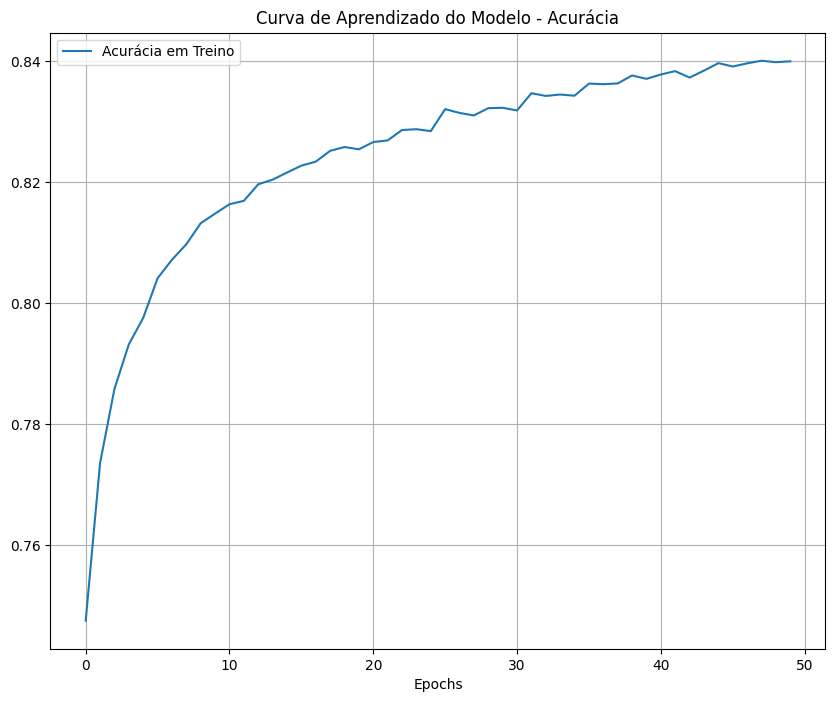

In [79]:
# Plot da Acurácia em Treino
plt.figure(figsize = [10,8])
plt.title("Curva de Aprendizado do Modelo - Acurácia")
plt.plot(history.history['accuracy'], label = 'Acurácia em Treino')
plt.xlabel("Epochs")
plt.legend()
plt.grid()

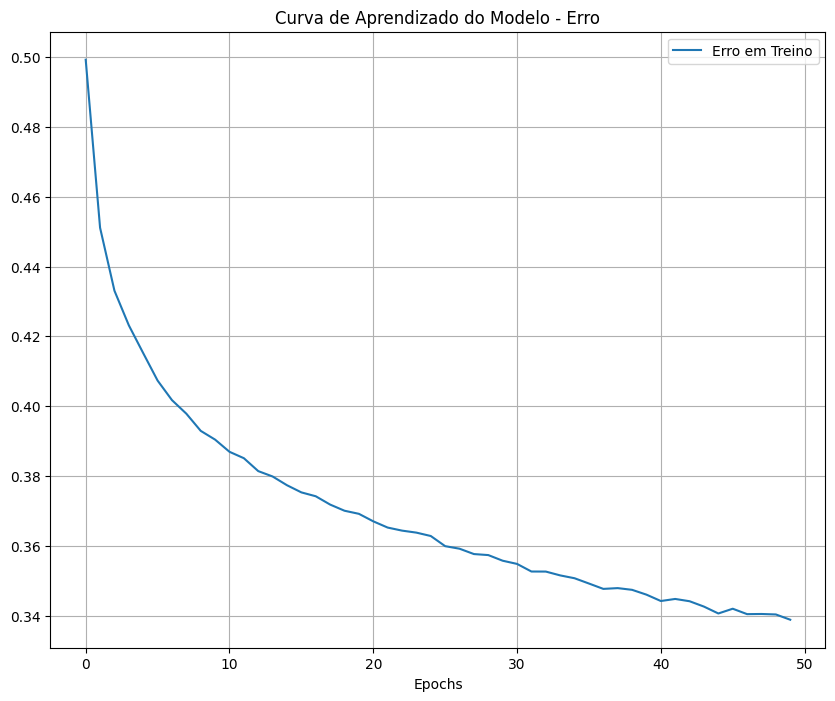

In [80]:
# Plot do Erro em Treino
plt.figure(figsize = [10,8])
plt.title("Curva de Aprendizado do Modelo - Erro")
plt.plot(history.history['loss'], label = 'Erro em Treino')
plt.xlabel("Epochs")
plt.legend()
plt.grid()

> Avaliação do Modelo nos Dados de Teste.

In [81]:
# Fazemos as previsões com os dados de teste
previsoes = modelo_fct.predict(X_teste)

645/645 [==============================] - 0s 317us/step


In [82]:
# Convertemos as previsões em previsões de classe
y_pred = (previsoes > 0.5) 

In [83]:
# Calculamos a acurácia comparando valor real com valor previsto
accuracy_score(y_teste, y_pred)

0.8382338670548277

In [84]:
# Salva o scaler
import joblib
joblib.dump(scaler, 'scaler_fct.pkl')

['scaler_fct.pkl']

In [85]:
# Salva o modelo
modelo_fct.save("modelo_fct.keras")

## Deploy e Pipeline de Inferência com o Modelo Treinado

Vamos considerar que os dados já atendem aos requisitos do pipeline de limpeza e transformação!

In [87]:
# Novos dados de um novo cliente
# Não temos a variável alvo. Isso é o que o modelo irá prever
novos_dados_fct = {
    'lead_time': [15.00],
    'arrival_date_year': [2016.00],
    'arrival_date_week_number': [23.00],
    'arrival_date_day_of_month': [30.00],
    'stays_in_weekend_nights': [2.00],
    'stays_in_week_nights': [5.00],
    'adults': [2.00],
    'children': [0.00],
    'babies': [0.00],
    'is_repeated_guest': [0.00],
    'previous_cancellations': [0.00],
    'previous_bookings_not_canceled': [0.00],
    'booking_changes': [0.00],
    'agent': [14.00],
    'days_in_waiting_list': [0.00],
    'adr': [115.84],
    'required_car_parking_spaces': [0.00],
    'total_of_special_requests': [0.00],
    'arrival_date_month_numerical': [5.00],
    'reserved_room_type_numerical': [4.00],
    'assigned_room_type_numerical': [4.00],
    'deposit_type_numerical': [0.00],
    'customer_type_numerical': [0.00],
    'hotel_numerical': [1.00],
    'meal_numerical': [0.00],
    'market_segment_numerical': [0.00],
    'distribution_channel_numerical': [0.00]
}

In [88]:
# Criando o DataFrame
df_novo_cliente = pd.DataFrame(novos_dados_fct)

In [89]:
df_novo_cliente.shape

(1, 27)

In [90]:
df_novo_cliente

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,...,total_of_special_requests,arrival_date_month_numerical,reserved_room_type_numerical,assigned_room_type_numerical,deposit_type_numerical,customer_type_numerical,hotel_numerical,meal_numerical,market_segment_numerical,distribution_channel_numerical
0,15.0,2016.0,23.0,30.0,2.0,5.0,2.0,0.0,0.0,0.0,...,0.0,5.0,4.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0


In [91]:
# Carregando o scaler do disco
scaler_fct_final = joblib.load('scaler_fct.pkl')

In [92]:
# Aplicamos o scaler aos novos_dados
df_novo_cliente_array = scaler_fct_final.transform(df_novo_cliente)

In [93]:
df_novo_cliente_array

array([[0.02384738, 0.5       , 0.42307692, 0.96666667, 0.125     ,
        0.12195122, 0.07692308, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.02434457, 0.        ,
        0.02260662, 0.        , 0.        , 0.36363636, 0.42857143,
        0.3       , 0.5       , 0.        , 1.        , 0.25      ,
        0.        , 0.        ]])

In [94]:
# Carrega o modelo do disco
from tensorflow.keras.models import load_model
modelo_fct_final = load_model("modelo_fct.keras")

In [95]:
# Fazemos a previsão
previsao = modelo_fct_final.predict(df_novo_cliente_array)

1/1 [==============================] - 0s 32ms/step


In [96]:
previsao

array([[0.45351076, 0.5464892 ]], dtype=float32)

> Podemos entregar a previsão no formato de probabilidade (quando o modelo permitir):

In [97]:
print("Esta é a probabilidade do cliente não cancelar a reserva (classe 0):", previsao[0, 0] * 100)

Esta é a probabilidade do cliente não cancelar a reserva (classe 0): 45.35107612609863


In [98]:
print("Esta é a probabilidade do cliente cancelar a reserva (classe 1):", previsao[0, 1] * 100)

Esta é a probabilidade do cliente cancelar a reserva (classe 1): 54.64891791343689


> Ou podemos entregar o modelo no formato de previsão de classe (para modelos de classificação):

In [99]:
# Verificando o primeiro valor do array
if previsao[0, 0] > 0.50:
    print("Esse cliente provavelmente não vai cancelar a reserva!")
else:
    print("Esse cliente provavelmente vai cancelar a reserva!")

Esse cliente provavelmente vai cancelar a reserva!


In [99]:
%reload_ext watermark
%watermark -a "Silmara Basso"

Author: Silmara Basso



In [ ]:
#%watermark -v -m

Python implementation: CPython
Python version       : 3.11.5
IPython version      : 9.4.0

Compiler    : Clang 15.0.0 (clang-1500.1.0.2.5)
OS          : Darwin
Release     : 23.2.0
Machine     : arm64
Processor   : arm
CPU cores   : 16
Architecture: 64bit



In [ ]:
#%watermark --iversions

tensorflow: 2.15.0
keras     : 2.15.0
pandas    : 2.3.0
matplotlib: 3.10.3
sklearn   : 1.7.0
joblib    : 1.5.1
seaborn   : 0.12.2
numpy     : 1.26.4



# Fim